In [155]:
#import kagglehub

#path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

#print("Path to dataset files:", path)

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_csv(f"{path}/Reviews.csv")

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [159]:
df['Helpful_Votes'] = df['HelpfulnessNumerator']
df['Total_Votes'] = df['HelpfulnessDenominator']
df.drop(['HelpfulnessNumerator', 'HelpfulnessDenominator'], axis=1, inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Id             568454 non-null  int64 
 1   ProductId      568454 non-null  object
 2   UserId         568454 non-null  object
 3   ProfileName    568428 non-null  object
 4   Score          568454 non-null  int64 
 5   Time           568454 non-null  int64 
 6   Summary        568427 non-null  object
 7   Text           568454 non-null  object
 8   Helpful_Votes  568454 non-null  int64 
 9   Total_Votes    568454 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [161]:
df.head()

,Id,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpful_Votes,Total_Votes
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,3,3
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0,0


In [162]:
len(df['ProductId'].unique())

74258

In [163]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
Score,0
Time,0
Summary,27
Text,0
Helpful_Votes,0
Total_Votes,0


In [164]:
length=len(df)

In [165]:
missingV1=df[['ProfileName','Summary']].isnull().sum()

percenatge=[]
for value in missingV1:
    text_form=f'{value/length*100:.5f}%'
    percenatge.append(text_form)

In [166]:
missing_values=pd.DataFrame({'missing values':missingV1,'percenatges':percenatge,'total number of rows':length})

In [167]:
missing_values

,missing values,percenatges,total number of rows
ProfileName,26,0.00457%,568454
Summary,27,0.00475%,568454


In [168]:
df.duplicated().sum()

np.int64(0)

In [169]:
num_col=df[['Helpful_Votes','Total_Votes']]

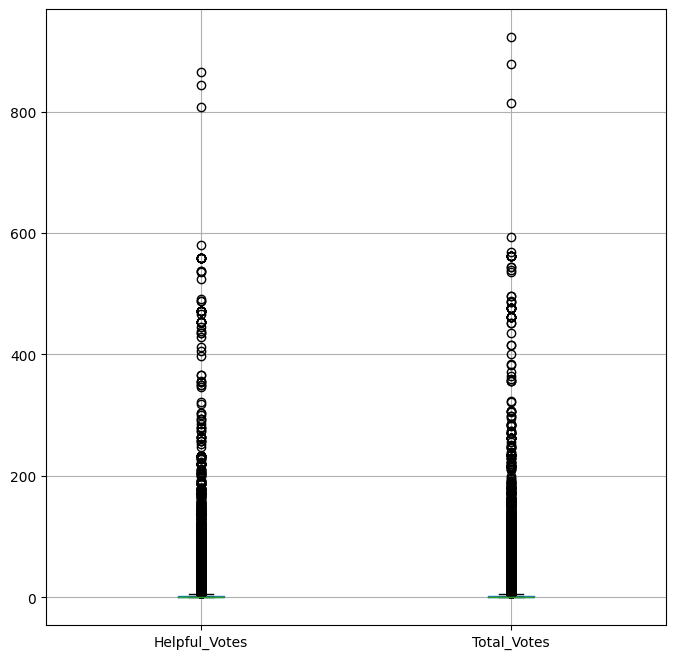

In [170]:
num_col.boxplot(figsize=(8,8))
plt.show()

In [171]:
IQR = num_col.quantile(0.75) - num_col.quantile(0.25)
IQR

,0
Helpful_Votes,2.0
Total_Votes,2.0


In [172]:
lower_bound = num_col.quantile(0.25) - 1.5 * IQR
upper_bound = num_col.quantile(0.75) + 1.5 * IQR

outliers = num_col[(num_col < lower_bound) | (num_col > upper_bound)]
outliers.dropna(how='all').info()

<class 'pandas.core.frame.DataFrame'>
Index: 52643 entries, 32 to 568436
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Helpful_Votes  37002 non-null  float64
 1   Total_Votes    52643 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


In [173]:
x = df.groupby('ProductId')['Helpful_Votes'].sum().sort_values(ascending=False)
x

,Helpful_Votes
ProductId,
B00012182G,3989
B000FI4O90,3535
B003B3OOPA,2944
B000VK08OC,2630
B004WTHCO2,2074
...,...
B009LSMTWE,0
B009KPU7Q8,0
B009KPU93E,0


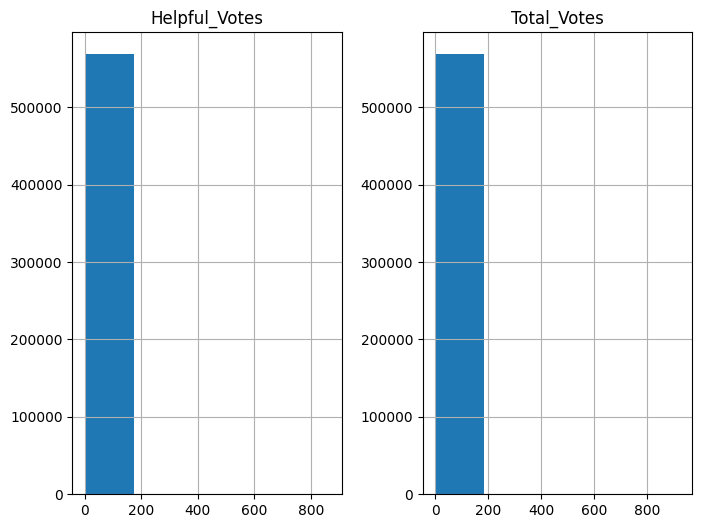

In [174]:
num_col.hist(bins = 5,figsize=(8,6))
plt.show()

## CLEANING THE TEXT

In [ ]:
#69,40,21

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean = []
tokens = []
for i in df['Text'].head(5000):
    stop_words=set(stopwords.words("english"))
    text = str(i).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    token = [word for word in text.split() if word not in stop_words]
    tokens.append(token)
    clean.append(" ".join(token))
print(clean)
tokens

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal', 'got wild hair taffy ordered five pound bag taffy enjoyable many flavors watermelon root beer melon peppermint grape etc complaint bit much redblack licoriceflavored pieces particular

[['bought',
  'several',
  'vitality',
  'canned',
  'dog',
  'food',
  'products',
  'found',
  'good',
  'quality',
  'product',
  'looks',
  'like',
  'stew',
  'processed',
  'meat',
  'smells',
  'better',
  'labrador',
  'finicky',
  'appreciates',
  'product',
  'better'],
 ['product',
  'arrived',
  'labeled',
  'jumbo',
  'salted',
  'peanutsthe',
  'peanuts',
  'actually',
  'small',
  'sized',
  'unsalted',
  'sure',
  'error',
  'vendor',
  'intended',
  'represent',
  'product',
  'jumbo'],
 ['confection',
  'around',
  'centuries',
  'light',
  'pillowy',
  'citrus',
  'gelatin',
  'nuts',
  'case',
  'filberts',
  'cut',
  'tiny',
  'squares',
  'liberally',
  'coated',
  'powdered',
  'sugar',
  'tiny',
  'mouthful',
  'heaven',
  'chewy',
  'flavorful',
  'highly',
  'recommend',
  'yummy',
  'treat',
  'familiar',
  'story',
  'cs',
  'lewis',
  'lion',
  'witch',
  'wardrobe',
  'treat',
  'seduces',
  'edmund',
  'selling',
  'brother',
  'sisters',
  'witch'],
 ['l

In [ ]:
cleaned_text = []
for i in clean :
    text = re.sub(r'(.)\1{2,}', r'\1', i)
    cleaned_text.append(text)

In [ ]:
clean[69]

'sooooo deliscious bad ate em fast gained pds fault'

In [ ]:
cleaned_text[69]

'so deliscious bad ate em fast gained pds fault'

In [ ]:
df['Text'] = df['Text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)

In [ ]:
df['Text'][69]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
tokens_root = []
nlp = spacy.load("en_core_web_sm")
for text in cleaned_text:
    doc = nlp(text)
    text_tokens = [token.lemma_ for token in doc]
    tokens_root.append(text_tokens)

In [ ]:
tokens_root[69]

['so', 'deliscious', 'bad', 'eat', 'em', 'fast', 'gain', 'pds', 'fault']

In [67]:
clean = pd.Series(clean)

In [68]:
df['Text'] = clean

In [69]:
df['Text'].head()

,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around centuries light pillowy citr...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...


In [70]:
#df.dropna(inplace=True)

**For the comparision between the model performance on Labeled Data and Unlabeled data**

In [71]:
df['Tag'] = np.where(df['Score'] >= 4, 1, -1)  #1 for positive, -1 for negative
df['Tag'] = np.where(df['Score'] == 3, 0, df['Tag']) #0 for neutral

In [72]:
df.groupby('Tag')['Score'].count()

,Score
Tag,
-1,82037
0,42640
1,443777
